# Вариант №12
### Точка 8
##### Месяцы 10, 11, 12

In [2]:
import pandas as pd

data = pd.DataFrame({10: [9.3, 8.5, 8.4, 9.0, 8.1, 8.2, 8.2, 8.6, 9.1, 9.9, 8.6, 8.9, 8.5, 9.3, 8.7, 8.4, 8.7, 8.7, 8.6, 7.9, 8.1, 8.8, 9.1, 8.4, 8.5, 8.4, 8.1, 7.4, 7.9, 7.9, 7.8, 8.5, 8.4, 8.2, 8.0, 8.5, 9.1],
                     11: [7.3, 7.2, 7.3, 7.4, 7.9, 7.9, 7.7, 8.0, 7.8, 8.6, 7.5, 7.9, 7.3, 7.6, 8.0, 7.1, 7.1, 7.5, 7.2, 6.5, 7.4, 6.9, 6.4, 7.7, 8.3, 6.5, 7.5, 6.0, 7.4, 6.3, 6.7, 7.8, 7.0, 7.4, 7.4, 7.8, 6.1],
                     12: [7.5, 7.2, 6.1, 6.8, 7.4, 7.8, 7.5, 7.1, 7.1, 7.4, 7.0, 6.4, 7.4, 6.8, 6.7, 6.0, 6.3, 6.2, 6.7, 5.6, 6.1, 5.1, 5.6, 6.6, 6.7, 5.9, 6.9, 5.4, 6.2, 5.3, 5.4, 6.7, 6.2, 6.6, 6.3, 5.8, 6.8]})
print(data.head())

    10   11   12
0  9.3  7.3  7.5
1  8.5  7.2  7.2
2  8.4  7.3  6.1
3  9.0  7.4  6.8
4  8.1  7.9  7.4


# Задание №1
### Проверка критерия Пирсона

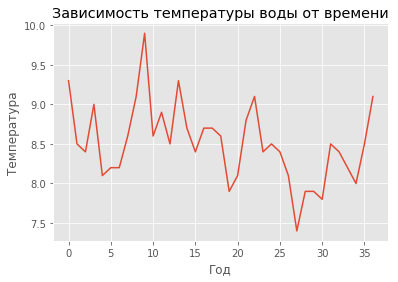

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

ax = data[10].plot(title='Зависимость температуры воды от времени')
q = ax.set(xlabel='Год', ylabel='Температура')

### 1.1
Не очень сильно похоже на нормальный закон распределения

### 1.2

In [4]:
import numpy as np

X1 = np.array(data[10])

X1.sort()
x_min, x_max = X1[0], X1[-1]
n = len(X1)
R = x_max - x_min

print('Размер выборки: ', n)
print('min: {}, max: {}'.format(x_min, x_max))
print('Размах выборки: ', R)

Размер выборки:  37
min: 7.4, max: 9.9
Размах выборки:  2.5


### 1.3

 Формула Стерджеса для определения числа интервалов N:
 
 
 
 $$ N = 1 + [3.322 lg n] = 1 + [log_2 n] $$

In [5]:
import math

N = 1 + math.floor(math.log2(n))

diap = np.linspace(x_min, x_max, N + 1)

h = R / N

print('Величина интервалов: ', h)

Величина интервалов:  0.4166666666666667


### 1.4

In [6]:
intervals = np.array([(diap[i-1], diap[i]) for i in range(1, N + 1)])
print(intervals)

[[7.4        7.81666667]
 [7.81666667 8.23333333]
 [8.23333333 8.65      ]
 [8.65       9.06666667]
 [9.06666667 9.48333333]
 [9.48333333 9.9       ]]


### 1.5

In [7]:
m = np.zeros(N,)

for i in X1:
    for (a1, a2), ind in zip(intervals, range(0, 6)):
        if a1 <= i <= a2:
            m[ind] += 1
            
w = m / len(X1)

print('Абсолютные частоты :', m)
print('Относительные частоты :', w)

Абсолютные частоты : [ 2. 10. 13.  6.  5.  1.]
Относительные частоты : [0.05405405 0.27027027 0.35135135 0.16216216 0.13513514 0.02702703]


### 1.6

In [8]:
middle = [(a1 + a2) / 2 for a1, a2 in intervals]
print(middle)

[7.608333333333334, 8.025, 8.441666666666666, 8.858333333333334, 9.275, 9.691666666666666]


### 1.7

(array([ 2., 10., 13.,  6.,  5.,  1.]),
 array([7.4       , 7.81666667, 8.23333333, 8.65      , 9.06666667,
        9.48333333, 9.9       ]),
 <a list of 6 Patch objects>)

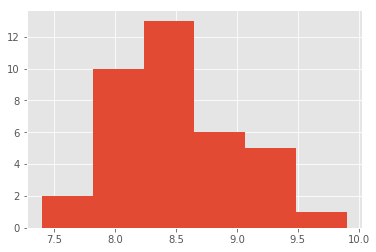

In [9]:
plt.hist(X1, bins = diap)

### 1.8

In [10]:
mean = 1 / n * sum(map(lambda m_i, x_i: m_i * x_i, m, middle)) 
std = math.sqrt(1 / n * sum(map(lambda m_i, x_i: m_i * (x_i - mean) ** 2, m, middle)))

print('Выборочное среднее: {} \nВыборочное среднее квадратичное отклонение: {}'.format(mean, std))

Выборочное среднее: 8.497972972972974 
Выборочное среднее квадратичное отклонение: 0.49549549549549554


### 1.9

In [11]:
z = (diap[:-1] - mean) / std
print(z)

[-2.21590909 -1.375      -0.53409091  0.30681818  1.14772727  1.98863636]


### 1.10

In [12]:
from scipy.stats import norm

normal_dist = norm(0,1)
P = []
for z_i in z:
    P.append(normal_dist.cdf(z_i) - sum(P))

m_ = np.array(P) * n
print(m_)

[ 0.49390798  2.63502374  7.8467231  11.98318246  9.39616109  3.78028656]


### 1.11

In [13]:
hi_2 = sum((m - m_) ** 2 / m_)
print(hi_2)

35.65133629174071


# Задание 2
### №2.1

In [14]:
x1_ = sum(data[10]) / n
x2_ = sum(data[11]) / n
x3_ = sum(data[12]) / n

print('Выборочное среднее для первого ряда: {} - {}'.format(x1_, data[10].mean()))
print('Выборочное среднее для второго ряда: {} - {}'.format(x2_, data[11].mean()))
print('Выборочное среднее для третьего ряда: {} - {}'.format(x3_, data[12].mean()))

Выборочное среднее для первого ряда: 8.505405405405405 - 8.505405405405405
Выборочное среднее для второго ряда: 7.335135135135136 - 7.335135135135136
Выборочное среднее для третьего ряда: 6.5027027027027025 - 6.5027027027027025


### №2.2

In [15]:
var1 = 1 / n * sum((data[10] - x1_) ** 2)
var2 = 1 / n * sum((data[11] - x2_) ** 2)
var3 = 1 / n * sum((data[12] - x3_) ** 2)

print('Выборочная дисперсия для первого ряда: {}'.format(var1))
print('Выборочная дисперсия для второго ряда: {}'.format(var2))
print('Выборочная дисперсия для третьего ряда: {}'.format(var3))

Выборочная дисперсия для первого ряда: 0.23780861943024123
Выборочная дисперсия для второго ряда: 0.3503871439006574
Выборочная дисперсия для третьего ряда: 0.4705332359386414


### №2.3

In [16]:
var1_ = 1 / (n-1) * sum((data[10] - x1_) ** 2)
var2_ = 1 / (n-1) * sum((data[11] - x2_) ** 2)
var3_ = 1 / (n-1) * sum((data[12] - x3_) ** 2)

print('Исправленная выборочная дисперсия для первого ряда: {} - {}'.format(var1_, data[10].var()))
print('Исправленная выборочная дисперсия для второго ряда: {} - {}'.format(var2_, data[11].var()))
print('Исправленная выборочная дисперсия для третьего ряда: {} - {}'.format(var3_, data[12].var()))

Исправленная выборочная дисперсия для первого ряда: 0.24441441441441458 - 0.24441441441441458
Исправленная выборочная дисперсия для второго ряда: 0.36012012012012007 - 0.36012012012012007
Исправленная выборочная дисперсия для третьего ряда: 0.48360360360360355 - 0.4836036036036036


### №2.4

In [17]:
std1 = np.sqrt(var1_)
std2 = np.sqrt(var2_)
std3 = np.sqrt(var3_)

print('Стандартное отклонение для первого ряда: {} - {}'.format(std1, data[10].std()))
print('Стандартное отклонение для второго ряда: {} - {}'.format(std2, data[11].std()))
print('Стандартное отклонение для третьего ряда: {} - {}'.format(std3, data[12].std()))

Стандартное отклонение для первого ряда: 0.49438286217709304 - 0.49438286217709304
Стандартное отклонение для второго ряда: 0.6001000917514678 - 0.6001000917514678
Стандартное отклонение для третьего ряда: 0.695416137002589 - 0.695416137002589


### №2.5

In [18]:
v1 = std1 / x1_
v2 = std2 / x2_
v3 = std3 / x3_

print('Коэф. вариации для первого ряда: {}'.format(v1))
print('Коэф. вариации для второго ряда: {}'.format(v2))
print('Коэф. вариации для третьего ряда: {}'.format(v3))

Коэф. вариации для первого ряда: 0.05812572577233061
Коэф. вариации для второго ряда: 0.08181172953133496
Коэф. вариации для третьего ряда: 0.10694263120987445


### №2.6

In [19]:
A1 = 1 / (n * (std1 ** 3)) * sum((data[10] - x1_) ** 3)
A2 = 1 / (n * (std2 ** 3)) * sum((data[11] - x2_) ** 3)
A3 = 1 / (n * (std3 ** 3)) * sum((data[12] - x3_) ** 3)

print('Коэф. асимметрии для первого ряда: {}'.format(A1))
print('Коэф. асимметрии для второго ряда: {}'.format(A2))
print('Коэф. асимметрии для третьего ряда: {}'.format(A3))

Коэф. асимметрии для первого ряда: 0.4006623718715947
Коэф. асимметрии для второго ряда: -0.41034449041258814
Коэф. асимметрии для третьего ряда: -0.17520741831059022


### №2.7

In [20]:
E1 = 1 / (n * (std1 ** 4)) * sum((data[10] - x1_) ** 4) - 3
E2 = 1 / (n * (std2 ** 4)) * sum((data[11] - x2_) ** 4) - 3
E3 = 1 / (n * (std3 ** 4)) * sum((data[12] - x3_) ** 4) - 3

print('Коэф. эксцесса для первого ряда: {}'.format(E1))
print('Коэф. эксцесса для второго ряда: {}'.format(E2))
print('Коэф. эксцесса для третьего ряда: {}'.format(E3))

Коэф. эксцесса для первого ряда: 0.3333286662310657
Коэф. эксцесса для второго ряда: -0.3086973175762182
Коэф. эксцесса для третьего ряда: -0.904597416328266


### №2.8

In [21]:
Me1 = sorted(data[10])[round(n/2)]
Me2 = sorted(data[11])[round(n/2)]
Me3 = sorted(data[12])[round(n/2)]

print('Медиана для первого ряда: {} - {}'.format(Me1, data[10].median()))
print('Медиана для второго ряда: {} - {}'.format(Me2, data[11].median()))
print('Медиана для третьего ряда: {} - {}'.format(Me3, data[12].median()))


Медиана для первого ряда: 8.5 - 8.5
Медиана для второго ряда: 7.4 - 7.4
Медиана для третьего ряда: 6.6 - 6.6


### №2.9

In [22]:
Mode1 = data[10].mode()[:2]
Mode2 = data[11].mode()[:2]
Mode3 = data[12].mode()[:2]

print('Мода для первого ряда: {}'.format(Mode1))
print('Мода для второго ряда: {}'.format(Mode2))
print('Мода для третьего ряда: {}'.format(Mode3))

Мода для первого ряда: 0    8.4
1    8.5
dtype: float64
Мода для второго ряда: 0    7.4
dtype: float64
Мода для третьего ряда: 0    6.7
dtype: float64


# Задание №3
### №3.1

Text(0, 0.5, 'Y')

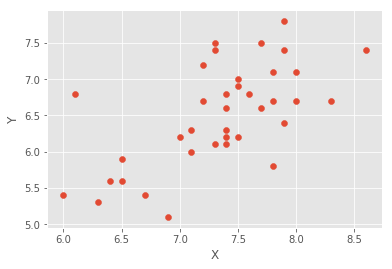

In [23]:
X = np.array(data[11])
Y = np.array(data[12])

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

### №3.2

In [24]:
S_xy = 1 / n * sum((X - x2_) * (Y - x3_))
r_xy = S_xy / std2 / std3

print('Ковариация :{} - {}'.format(S_xy, np.cov(X,Y)[0][1]))
print('Корреляция :{} - {}'.format(r_xy, np.corrcoef(X,Y)[0][1]))

Ковариация :0.25612125639152666 - 0.26323573573573567
Корреляция :0.6137297364130251 - 0.6307777846467201


### №3.3

In [25]:
from scipy import stats

alpha_1, alpha_2 = 0.025, 0.065

sigma = np.sqrt((1 - r_xy ** 2) / (n-2))
t_student = r_xy / sigma

stud = stats.t(n-2)

print('Среднеквадратичная ошибка лин. коэфф. корреляции: ', sigma)
print('t_кр для alpha = {} - {}'.format(alpha_1, stud.ppf(1-alpha_1)))
print('t_кр для alpha = {} - {}'.format(alpha_2, stud.ppf(1-alpha_2)))
print('t_рас =',t_student)

Среднеквадратичная ошибка лин. коэфф. корреляции:  0.13345259304255883
t_кр для alpha = 0.025 - 2.0301079282503425
t_кр для alpha = 0.065 - 1.5505744431080954
t_рас = 4.598859583172753


### №3.4

In [26]:
alpha = 0.05
y = 1 - alpha

z_y = abs(stats.norm.ppf(alpha/2))

a = 0.5 * np.log((1 + r_xy) / (1 - r_xy)) - z_y / np.sqrt(n - 3)
beta = 0.5 * np.log((1 + r_xy) / (1 - r_xy)) + z_y / np.sqrt(n - 3)

interv = ((np.exp(2 * a) - 1) / (np.exp(2 * a) + 1), (np.exp(2 * beta) - 1) / (np.exp(2 * beta) + 1)) 
print('Доверительный интервал для корреляции:', interv)

Доверительный интервал для корреляции: (0.3616231581322753, 0.7822003050827616)


# Задание №4
### №4.1

In [27]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X.reshape(-1,1), Y)

print("y = {:.2f}*x + {:.2f}".format(linear_regressor.coef_[0], linear_regressor.intercept_))

y = 0.73*x + 1.14


### №4.2

Text(0, 0.5, 'Y')

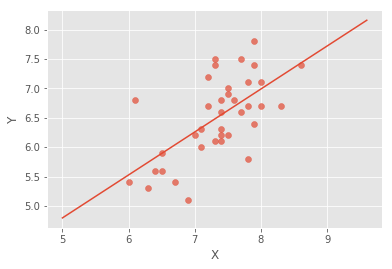

In [28]:
plt.scatter(X, Y, alpha = 0.7)
x = np.linspace(X.min()-1, X.max()+1, 50)

plt.plot(x, linear_regressor.predict(x.reshape(-1,1)))
plt.xlabel('X')
plt.ylabel('Y')

### №4.3

In [29]:
sigma_2 = var3_ * (1 - r_xy ** 2)
print('Дисперсия отклонения:', sigma_2)

Дисперсия отклонения: 0.3014474442818375


### №4.4

In [30]:
sigma_a = (sigma_2 ** 0.5) / (std2 * (n - 2) ** 0.5)
sigma_b = (sigma_2 ** 0.5) / ((n - 2) ** 0.5) * ((1 + x1_ ** 2 / var2_) ** 0.5)

print('Стандартные случайные погрешности a:', sigma_a)
print('Стандартные случайные погрешности b:', sigma_b)

Стандартные случайные погрешности a: 0.15464934600454983
Стандартные случайные погрешности b: 1.3186252571871748


### №4.5

In [31]:
T_a = linear_regressor.coef_[0] / sigma_a
T_b = linear_regressor.intercept_ / sigma_b

print('Критерий Стьюдента T для a:', T_a)
print('Критерий Стьюдента T для b:', T_b)
print('t_кр для alpha = {} : {}'.format(alpha_1, stud.ppf(1-alpha_1)))

Критерий Стьюдента T для a: 4.726605682705329
Критерий Стьюдента T для b: 0.8652684329034442
t_кр для alpha = 0.025 : 2.0301079282503425


# Задание №5
### №5.1

In [32]:
y_predict = linear_regressor.predict(X.reshape(-1,1))

### №5.2

Text(0, 0.5, 'Температура воды, $\\degree C$')

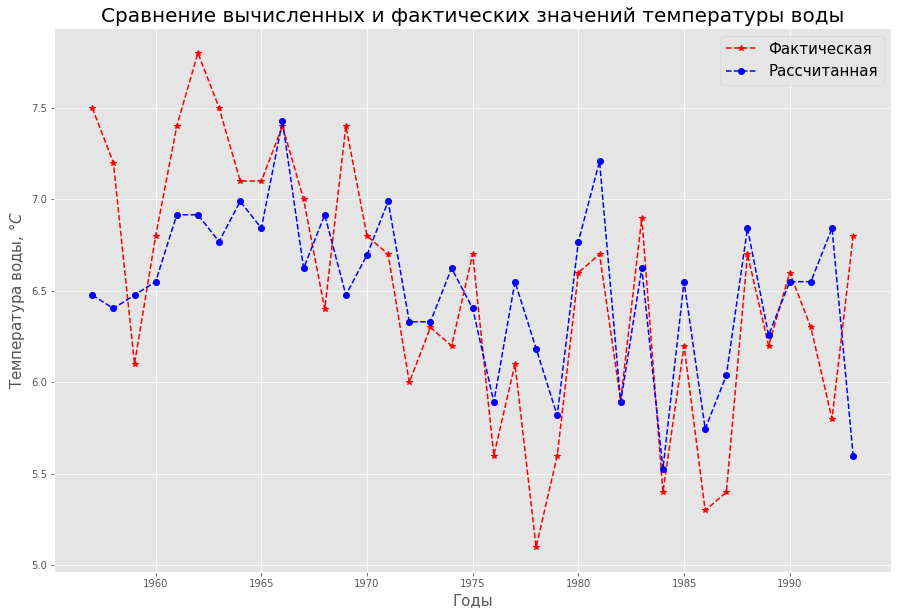

In [53]:
date = np.arange(1957, 1994)

plt.figure(figsize=(15, 10))
plt.plot(date, Y, 'r--*', label='Фактическая')
plt.plot(date, y_predict, 'b--o', label='Рассчитанная')
plt.legend(fontsize=15)
plt.title('Сравнение вычисленных и фактических значений температуры воды', fontsize=20)
plt.xlabel('Годы', fontsize=15)
plt.ylabel('Температура воды, $\degree C$', fontsize=15)

### №5.3

In [34]:
sigma2_ = 1 / n * sum((y_predict - x3_) ** 2)
print('Объясненная уравнением регрессии дисперсия:', sigma2_)

Объясненная уравнением регрессии дисперсия: 0.1872160526362597


### №5.4

In [35]:
D_ = 1 / n * sum((y_predict - Y) ** 2)
print('Остаточная дисперсия:', D_)

Остаточная дисперсия: 0.2833171833023818


### №5.5

In [36]:
nu_2 = sigma2_ / var3
print('Коэффициент детерминации:', nu_2)
print('nu_2 - r_xy =', nu_2 - r_xy ** 2)

Коэффициент детерминации: 0.3978806136038244
nu_2 - r_xy = 0.02121642424622311


### №5.6

In [38]:
F_cr = (n-2) * sigma2_ / D_
print('F-критическое:', F_cr)
print('F-табличное:', 4.12)

F-критическое: 23.128007154001672
F-табличное: 4.12
